#1. 📌 Extracción

In [21]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data=pd.read_json('/content/drive/MyDrive/Challenge_2/TelecomX_Data.json')
costumer_df=pd.json_normalize(data['customer'])
phone_df=pd.json_normalize(data['phone'])
internet_df=pd.json_normalize(data['internet'])
account_df=pd.json_normalize(data['account'])
df_total=pd.concat([data[['customerID','Churn']],costumer_df,phone_df,internet_df,account_df],axis=1)
df_total.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [22]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [23]:
# Guardar en CSV
df_total.to_csv('data_acomodada.csv', index=False, encoding='utf-8')

print("Archivo CSV generado correctamente.")

Archivo CSV generado correctamente.


#2. 🔧 Transformación

## 2.1 Conocer conjunto de datos

In [24]:
# 1. Ver valores ausentes
print("Valores nulos por columna:")
print(df_total.isnull().sum())

Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


## 2.2 Comprobacion de incoherencias

In [25]:
# A. Ver duplicados
duplicados = df_total.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")


Filas duplicadas: 0


In [26]:
# B. Revisar formatos de columnas categóricas
print("\nValores únicos por columna categórica:")
for col in df_total.select_dtypes(include='object').columns:
    print(f"{col}: {df_total[col].unique()}")


Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [27]:
# C. Revisar rangos y coherencia en columnas numéricas
print("\nEstadísticas descriptivas de columnas numéricas:")
print(df_total.describe())


Estadísticas descriptivas de columnas numéricas:
       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000


In [28]:
# D. Buscar todas las coincidencias
mask = df_total.isin(['No internet service', 'No phone service'])

# Ver solo las filas y columnas donde aparece
coincidencias = df_total[mask.any(axis=1)]
print(coincidencias)

# Ver lista de columnas donde hay coincidencias
columnas_con_valores = mask.any().index[mask.any()].tolist()
print("Columnas con esos valores:", columnas_con_valores)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
10    0017-DINOC    No    Male              0      No         No      54   
14    0019-GFNTW    No  Female              0      No         No      56   
16    0020-JDNXP    No  Female              0     Yes        Yes      34   
19    0023-HGHWL   Yes    Male              1      No         No       1   
20    0023-UYUPN    No  Female              1     Yes         No      50   
...          ...   ...     ...            ...     ...        ...     ...   
7252  9972-EWRJS    No  Female              0     Yes        Yes      67   
7256  9975-GPKZU    No    Male              0     Yes        Yes      46   
7257  9975-SKRNR    No    Male              0      No         No       1   
7261  9986-BONCE   Yes  Female              0      No         No       4   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
10    

## 2.3 Manejo de Inconsistencias

In [29]:
df_total = df_total.replace({
    'No internet service': 'No',
    'No phone service': 'No'
})

print("\nValores únicos por columna categórica:")
for col in df_total.select_dtypes(include='object').columns:
    print(f"{col}: {df_total[col].unique()}")


Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [30]:
# Borrar filas donde Churn está vacío
df_total = df_total[df_total['Churn'] != '']
df_total=df_total[df_total['Churn'] != ' ']
print("\nValores únicos por columna categórica:")
for col in df_total.select_dtypes(include='object').columns:
    print(f"{col}: {df_total[col].unique()}")


Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


## 2.4 Columna de cuentas diarias

In [31]:
# Crear columna 'Cuentas_Diarias' dividiendo el cargo mensual entre 30 días
df_total['Cuentas_Diarias'] = df_total['Charges.Monthly'] / 30
df_total['Cuentas_Diarias']=df_total['Cuentas_Diarias'].round(2)
# Verificar resultado
print(df_total[['Charges.Monthly', 'Cuentas_Diarias']].head())

   Charges.Monthly  Cuentas_Diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80


##2.5 Estandarización y transformación de datos (opcional)

In [32]:
# Trabajar sobre una copia
datos_std = df_total.copy()

# 1) Binarias Yes/No -> 1/0
binarias = [
    'Churn','Partner','Dependents','PhoneService','MultipleLines',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','PaperlessBilling'
]
datos_std[binarias] = datos_std[binarias].replace({'Yes':1,'No':0})

# 2) Otras conversiones simples
# gender -> 1/0 (Male/Female)
datos_std['gender'] = datos_std['gender'].replace({'Male':1,'Female':0})

# SeniorCitizen ya suele ser 0/1; por si acaso:
datos_std['SeniorCitizen'] = pd.to_numeric(datos_std['SeniorCitizen'], errors='coerce').fillna(0).astype(int)

# 3) Asegurar numéricos
datos_std['Charges.Monthly'] = pd.to_numeric(datos_std['Charges.Monthly'], errors='coerce')
datos_std['Charges.Total']   = pd.to_numeric(datos_std['Charges.Total'],   errors='coerce')
datos_std['Cuentas_Diarias']= pd.to_numeric(datos_std['Cuentas_Diarias'],   errors='coerce')

# (Opcional) Renombrar a español más claro
datos_std = datos_std.rename(columns={
    'customerID':'ID_Cliente',
    'Churn':'Dejo_Empresa',
    'gender':'Genero',
    'Partner':'Pareja',
    'tenure':'Meses_Contrato',
    'Dependents':'Dependientes',
    'SeniorCitizen':'Adulto_Mayor',
    'PhoneService':'Servicio_Telefono',
    'MultipleLines':'Multiples_Lineas',
    'InternetService':'Servicio_Internet',
    'OnlineSecurity':'Seguridad_Online',
    'OnlineBackup':'Respaldo_Online',
    'DeviceProtection':'Proteccion_Dispositivo',
    'TechSupport':'Soporte_Tecnico',
    'StreamingTV':'TV_Streaming',
    'StreamingMovies':'Peliculas_Streaming',
    'PaperlessBilling':'Factura_Digital',
    'Charges.Monthly':'Cargo_Mensual',
    'Charges.Total':'Cargo_Total',
    'Contract':'Tipo_Contrato',
    'PaymentMethod':'Metodo_Pago'
})

# Revisa el resultado
print(datos_std.head(3))
datos_std.info()

   ID_Cliente  Dejo_Empresa  Genero  Adulto_Mayor  Pareja  Dependientes  \
0  0002-ORFBO             0       0             0       1             1   
1  0003-MKNFE             0       1             0       0             0   
2  0004-TLHLJ             1       1             0       0             0   

   Meses_Contrato  Servicio_Telefono  Multiples_Lineas Servicio_Internet  ...  \
0               9                  1                 0               DSL  ...   
1               9                  1                 1               DSL  ...   
2               4                  1                 0       Fiber optic  ...   

   Proteccion_Dispositivo  Soporte_Tecnico  TV_Streaming  Peliculas_Streaming  \
0                       0                1             1                    0   
1                       0                0             0                    1   
2                       1                0             0                    0   

    Tipo_Contrato  Factura_Digital       Metodo_P

/tmp/ipython-input-873983523.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_std[binarias] = datos_std[binarias].replace({'Yes':1,'No':0})
/tmp/ipython-input-873983523.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_std['gender'] = datos_std['gender'].replace({'Male':1,'Female':0})


In [33]:
#Logramos verificar que habia Cargo_total en vacio, entonces eliminaremos esas filas
datos_std = datos_std.dropna(subset=['Cargo_Total'])
datos_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Dejo_Empresa            7032 non-null   int64  
 2   Genero                  7032 non-null   int64  
 3   Adulto_Mayor            7032 non-null   int64  
 4   Pareja                  7032 non-null   int64  
 5   Dependientes            7032 non-null   int64  
 6   Meses_Contrato          7032 non-null   int64  
 7   Servicio_Telefono       7032 non-null   int64  
 8   Multiples_Lineas        7032 non-null   int64  
 9   Servicio_Internet       7032 non-null   object 
 10  Seguridad_Online        7032 non-null   int64  
 11  Respaldo_Online         7032 non-null   int64  
 12  Proteccion_Dispositivo  7032 non-null   int64  
 13  Soporte_Tecnico         7032 non-null   int64  
 14  TV_Streaming            7032 non-null   int64

In [34]:
print("\nValores únicos por columna categórica:")
for col in datos_std.columns:
    print(f"{col}: {datos_std[col].unique()}")


Valores únicos por columna categórica:
ID_Cliente: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Dejo_Empresa: [0 1]
Genero: [0 1]
Adulto_Mayor: [0 1]
Pareja: [1 0]
Dependientes: [1 0]
Meses_Contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Servicio_Telefono: [1 0]
Multiples_Lineas: [0 1]
Servicio_Internet: ['DSL' 'Fiber optic' 'No']
Seguridad_Online: [0 1]
Respaldo_Online: [1 0]
Proteccion_Dispositivo: [0 1]
Soporte_Tecnico: [1 0]
TV_Streaming: [1 0]
Peliculas_Streaming: [0 1]
Tipo_Contrato: ['One year' 'Month-to-month' 'Two year']
Factura_Digital: [1 0]
Metodo_Pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Cargo_Mensual: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Cargo_Total: [ 593.3   542.4   280.85 ...  742.9  4627.65

#📊 Carga y análisis

##3.1 Analisis Descriptivo

In [35]:
#Tomando solo las variables cuantitativas
import pandas as pd

columnas_numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']

# Análisis descriptivo
analisis = datos_std[columnas_numericas].describe()

# Calcular también la mediana (porque describe no la incluye por defecto)
analisis.loc['median'] = datos_std[columnas_numericas].median()

print(analisis)

        Meses_Contrato  Cargo_Mensual  Cargo_Total  Cuentas_Diarias
count      7032.000000    7032.000000  7032.000000      7032.000000
mean         32.421786      64.798208  2283.300441         2.159891
std          24.545260      30.085974  2266.771362         1.002955
min           1.000000      18.250000    18.800000         0.610000
25%           9.000000      35.587500   401.450000         1.187500
50%          29.000000      70.350000  1397.475000         2.340000
75%          55.000000      89.862500  3794.737500         2.992500
max          72.000000     118.750000  8684.800000         3.960000
median       29.000000      70.350000  1397.475000         2.340000


##3.2 Distribucion de evasion

/tmp/ipython-input-1269244936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")


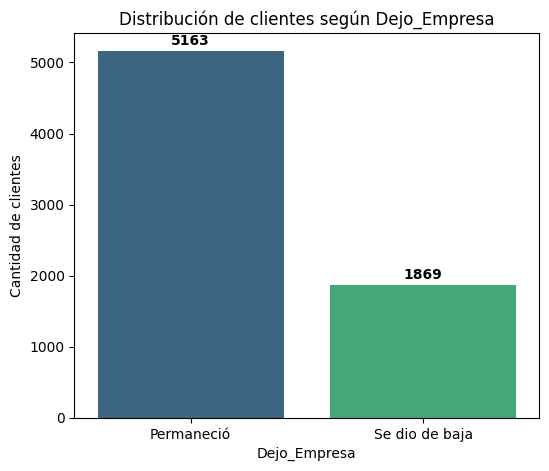

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable Dejo_Empresa
conteo = datos_std['Dejo_Empresa'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,5))
ax = sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")

# Etiquetas en las barras
for i, valor in enumerate(conteo.values):
    ax.text(i, valor + 50, str(valor), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks([0, 1], ["Permaneció", "Se dio de baja"])
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de clientes según Dejo_Empresa")
plt.show()

In [37]:
datos_std = datos_std.drop(columns=['ID_Cliente'])

##3.3 Recuento de evasión por variables categóricas

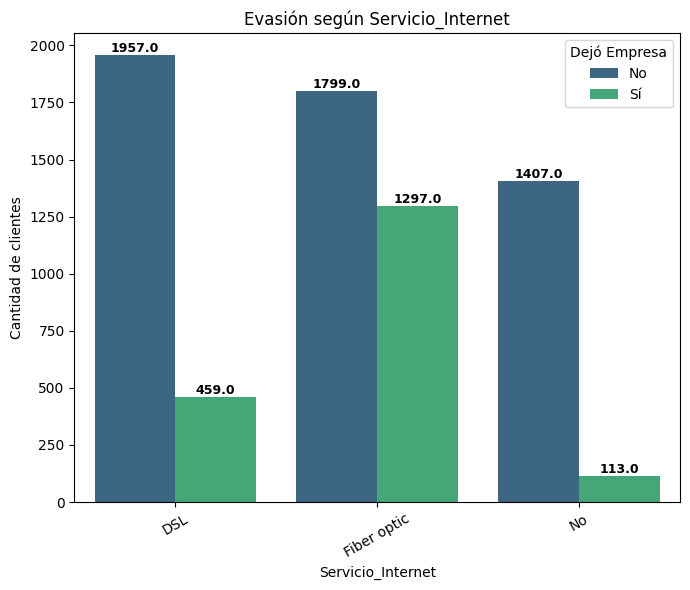

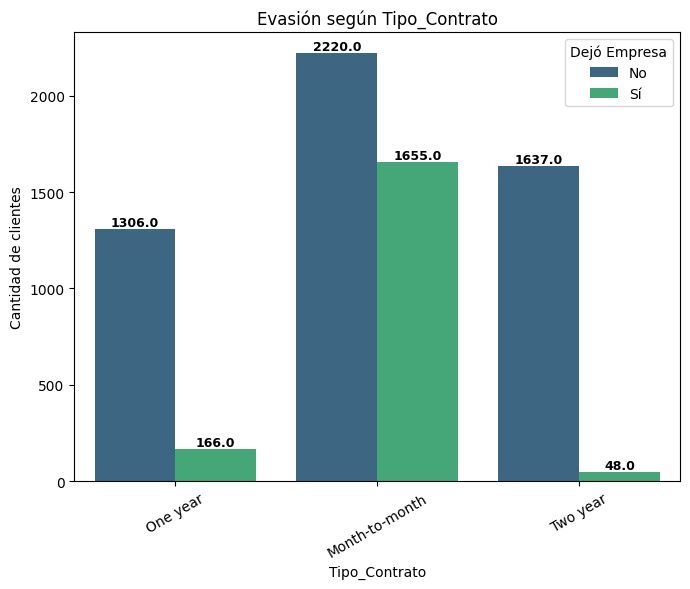

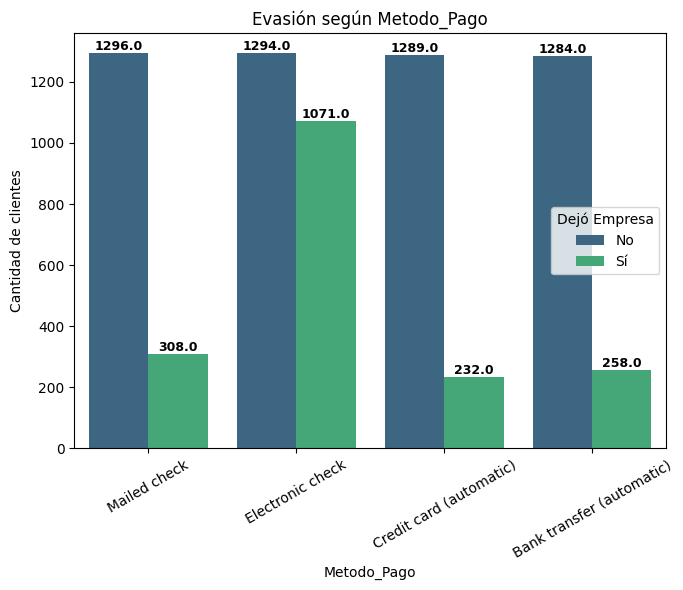

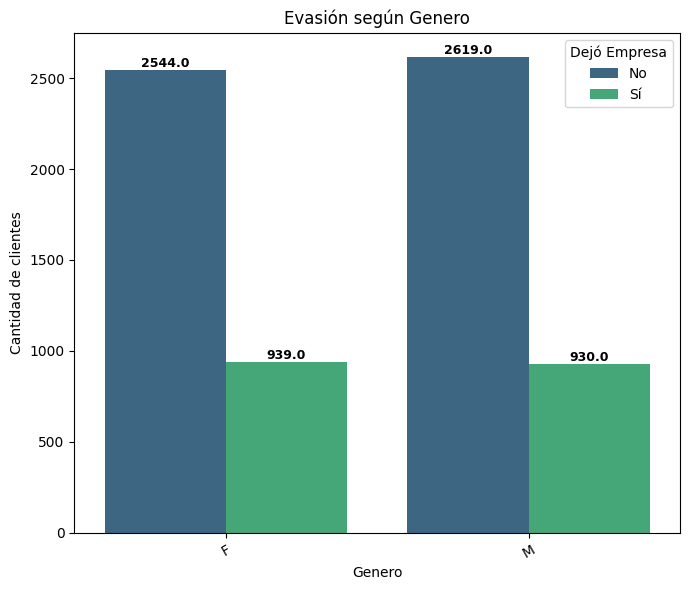

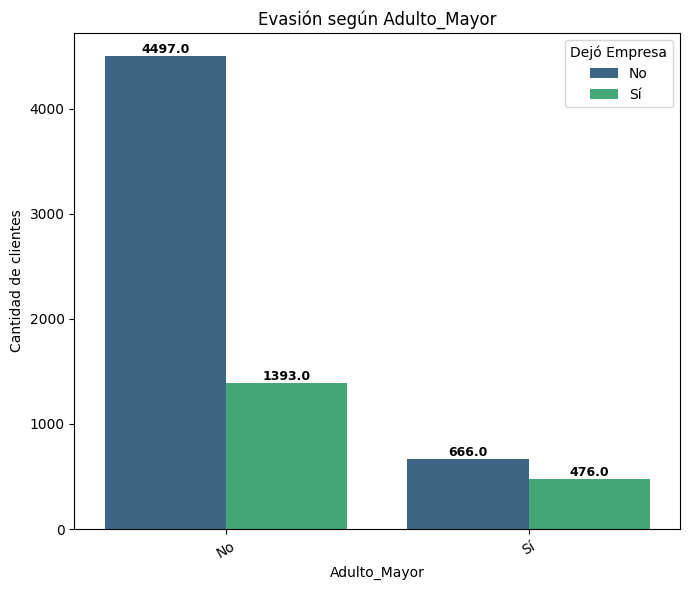

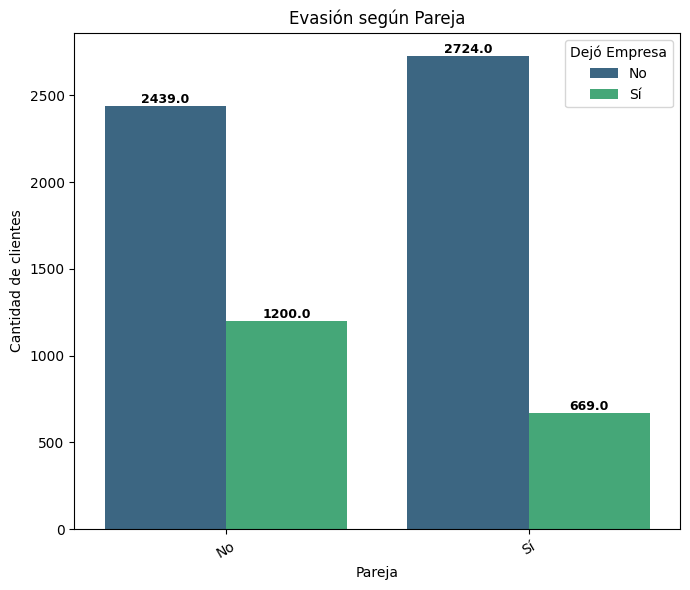

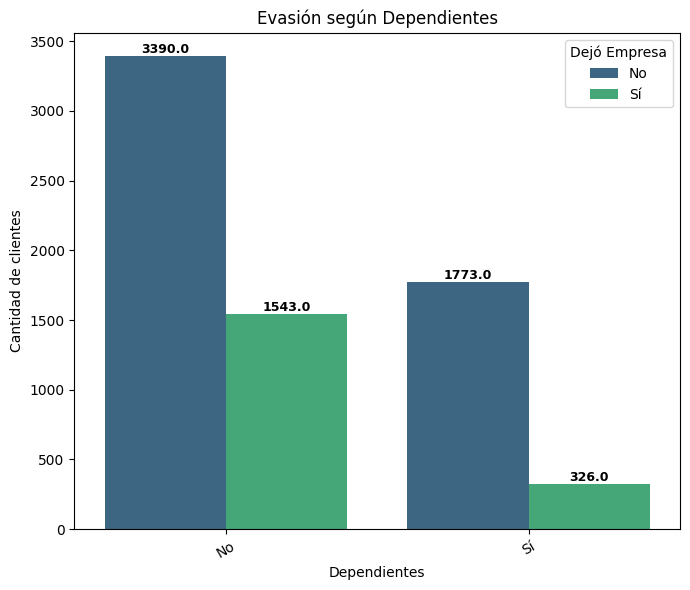

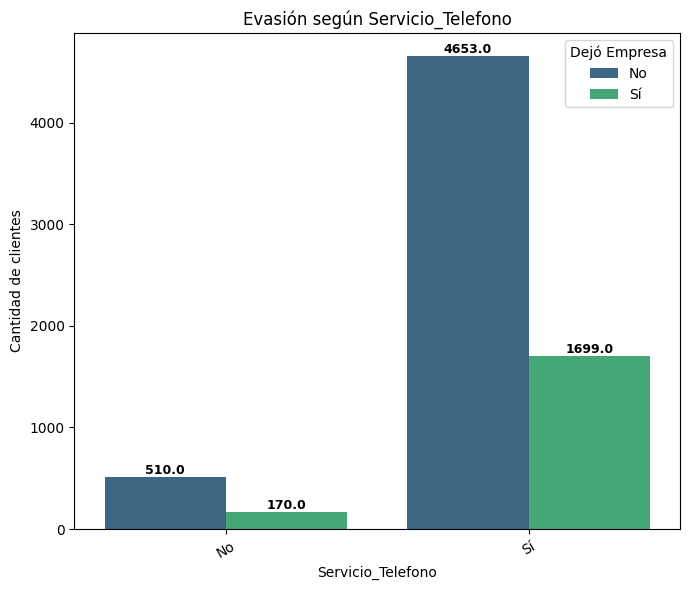

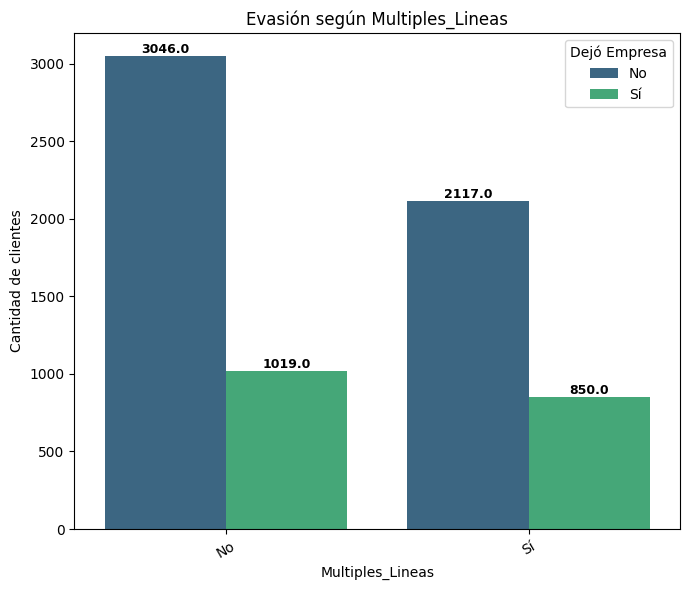

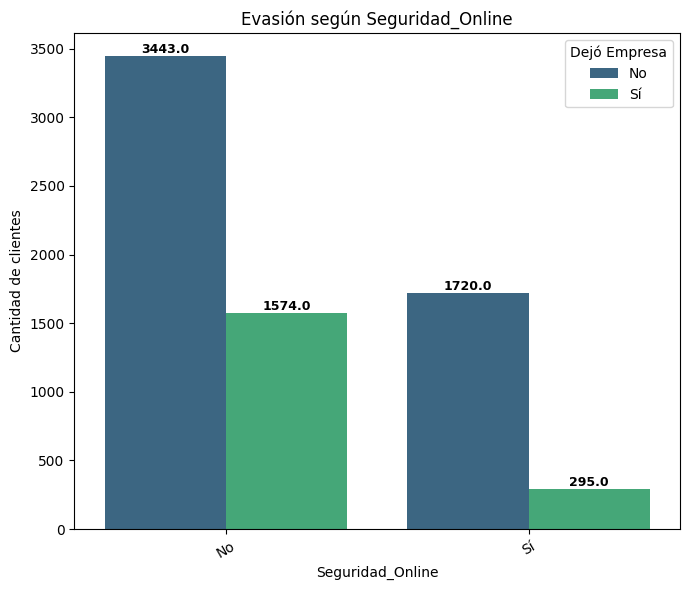

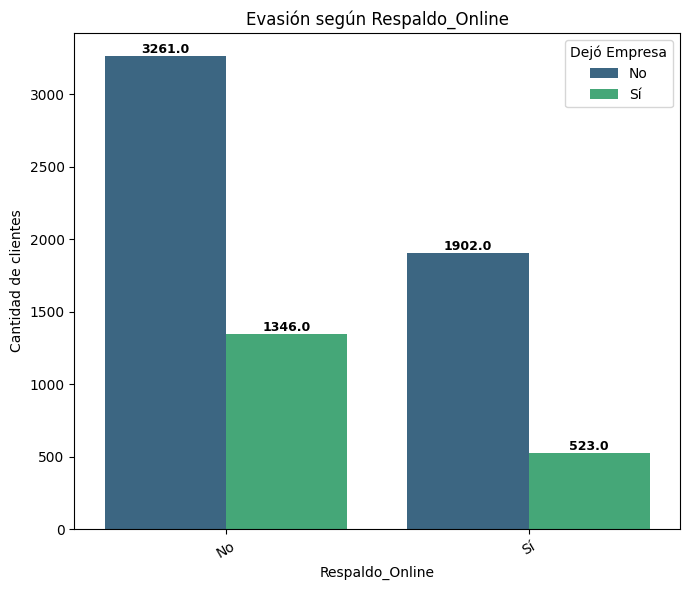

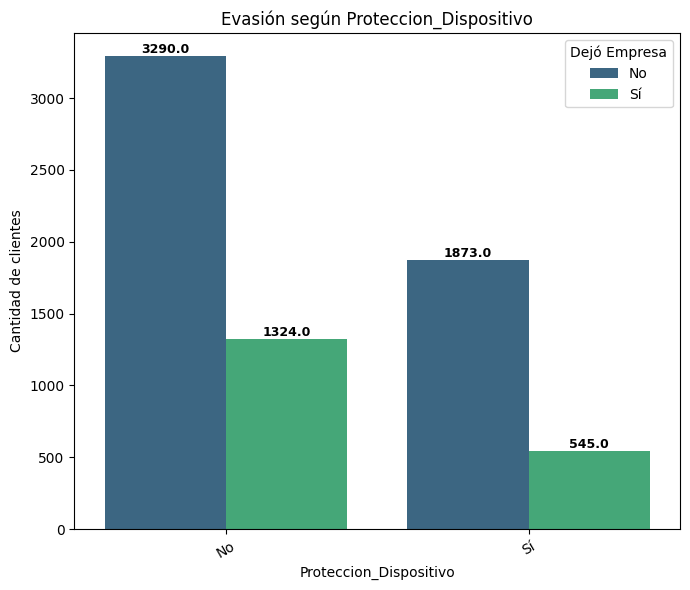

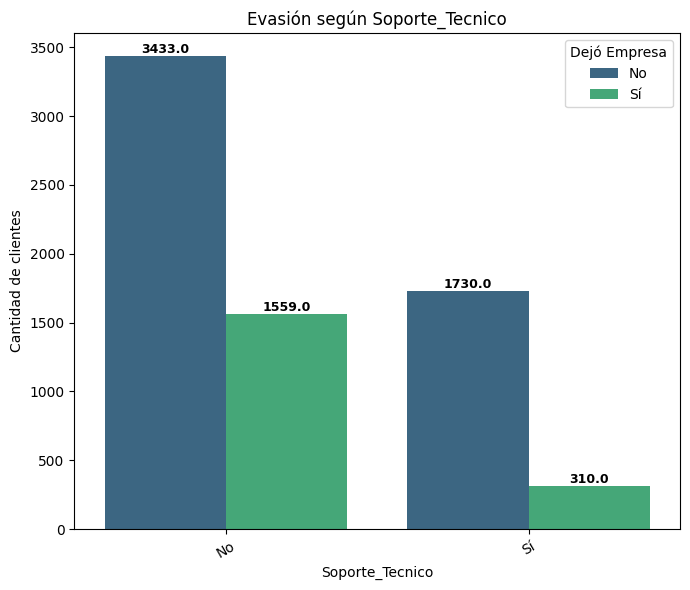

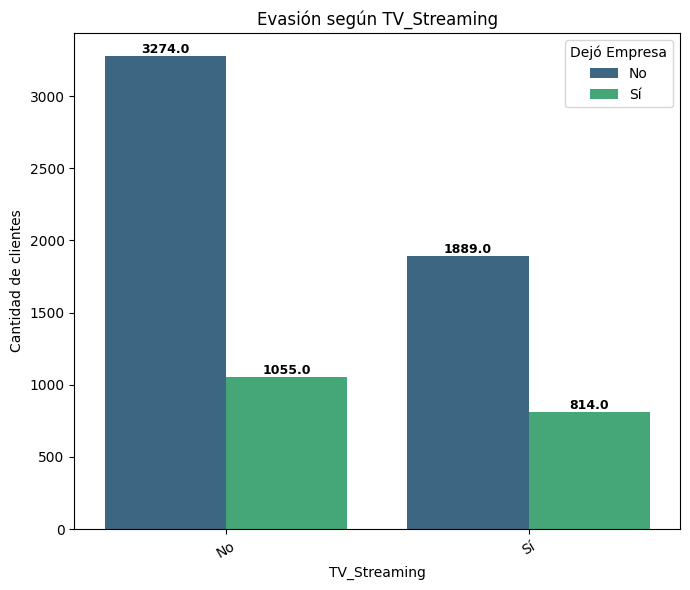

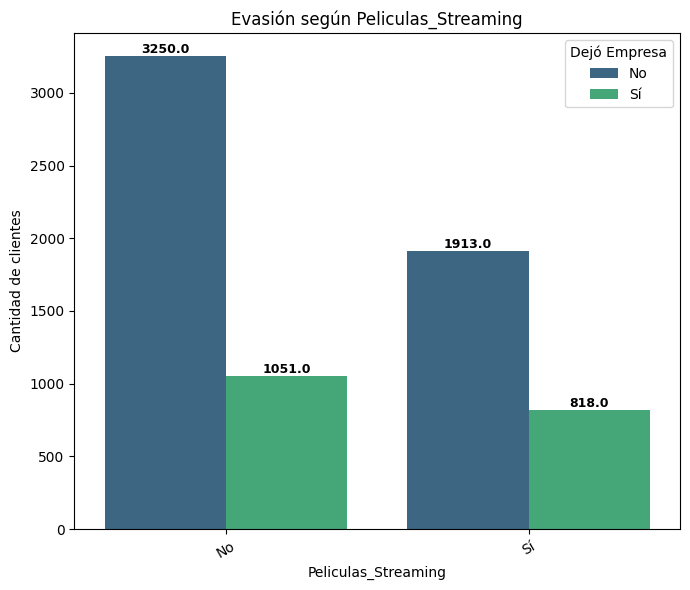

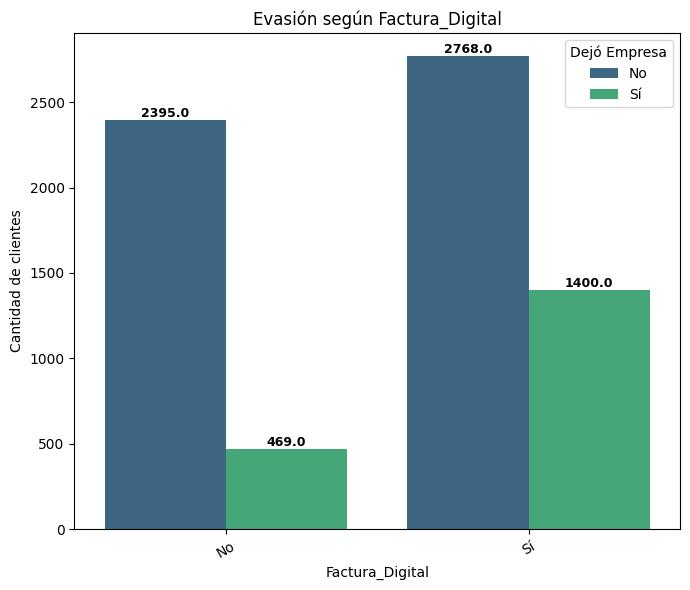

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.api.types as ptypes

# --- Asegurar mapeo Genero: M=1, F=0 ---
if ptypes.is_object_dtype(datos_std['Genero']):
    datos_std['Genero'] = datos_std['Genero'].map({'M': 1, 'F': 0}).astype('int64')

# --- Detectar variables categóricas ---
cat_obj = datos_std.select_dtypes(include=['object']).columns.tolist()
cat_bin = [c for c in datos_std.select_dtypes(include=['int64']).columns
           if datos_std[c].nunique() == 2 and c != 'Dejo_Empresa']
variables_categoricas = cat_obj + cat_bin

# --- Mapas de etiquetas para mostrar ---
default_bin_labels = {0: 'No', 1: 'Sí'}
special_labels = {
    'Genero': {0: 'F', 1: 'M'}  # SOLO Genero
}

for var in variables_categoricas:
    # Construir columna temporal con etiquetas legibles
    if var in special_labels:
        x_labels = datos_std[var].map(special_labels[var])
        x_order = [special_labels[var][0], special_labels[var][1]]  # ['F','M']
    elif ptypes.is_integer_dtype(datos_std[var]) and datos_std[var].nunique() == 2:
        x_labels = datos_std[var].map(default_bin_labels)
        x_order = [default_bin_labels[0], default_bin_labels[1]]   # ['No','Sí']
    else:
        x_labels = datos_std[var]  # ya es object/categoría
        x_order = None  # dejar que seaborn ordene por defecto

    # DataFrame para graficar
    tmp = pd.DataFrame({
        var: x_labels,
        'Dejo_Empresa': datos_std['Dejo_Empresa']
    })

    plt.figure(figsize=(7,6))
    ax = sns.countplot(
        data=tmp, x=var, hue='Dejo_Empresa',
        order=x_order, hue_order=[0, 1], palette='viridis'
    )

    # Números encima de cada barra
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{h}', (p.get_x() + p.get_width()/2., h),
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.title(f"Evasión según {var}")
    plt.ylabel("Cantidad de clientes")
    plt.xlabel(var)
    plt.legend(title="Dejó Empresa", labels=["No", "Sí"])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


##3.4 Conteo de evasión por variables numéricas

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


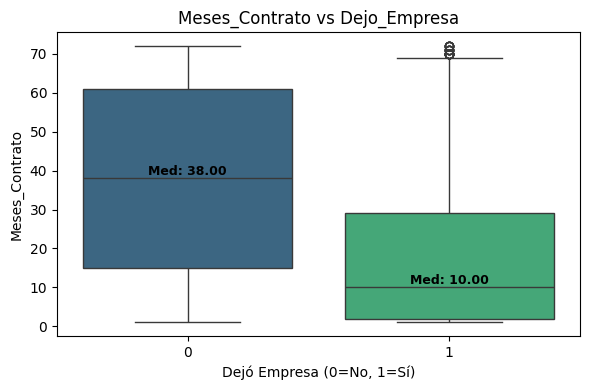

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


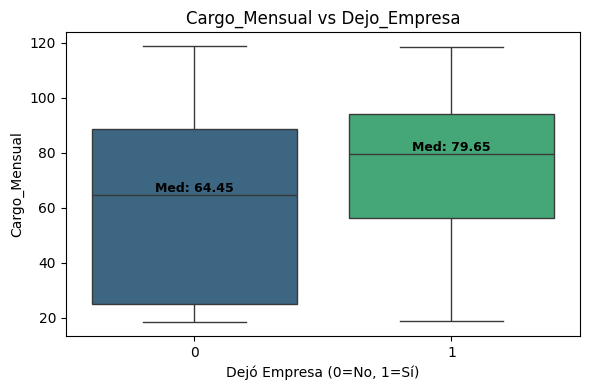

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


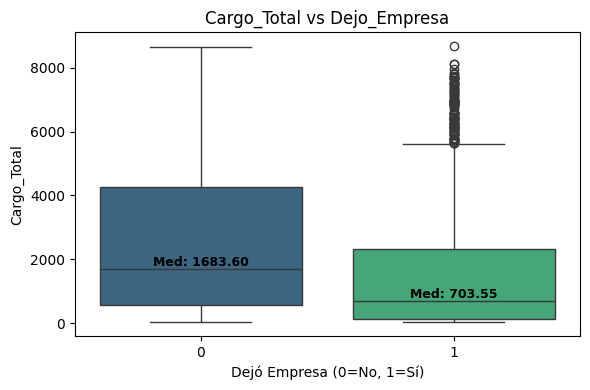

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


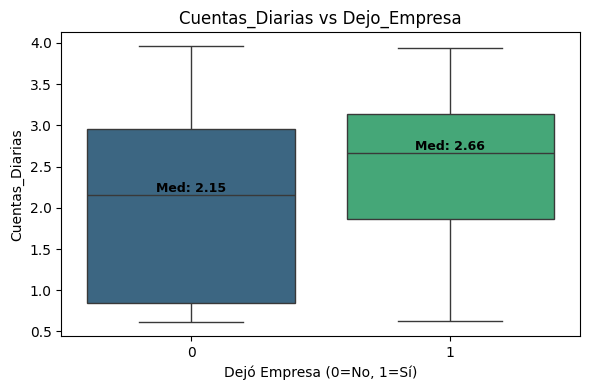

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

TARGET = "Dejo_Empresa"
num_cols = ["Meses_Contrato", "Cargo_Mensual", "Cargo_Total", "Cuentas_Diarias"]

for var in num_cols:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(
        data=datos_std, x=TARGET, y=var,
        order=[0,1], palette="viridis"
    )
    plt.title(f"{var} vs {TARGET}")
    plt.xlabel("Dejó Empresa (0=No, 1=Sí)")
    plt.ylabel(var)

    # Medianas anotadas
    med = datos_std.groupby(TARGET)[var].median()
    for x, lab in enumerate([0, 1]):
        y = med.loc[lab]
        ax.text(x, y, f"Med: {y:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

    plt.tight_layout()
    plt.show()

#📄Informe final

1. Introduccion:

  El objetivo del analisis es ver que variables categoricas y cuantitativas influyen en que el cliente se desligue de la empresa TelecomX, y el problema que se presenta es que 26.6% de los clientes que usan el servicio se dan de baja del servicio, tal como se muestra en el grafico siguiente.

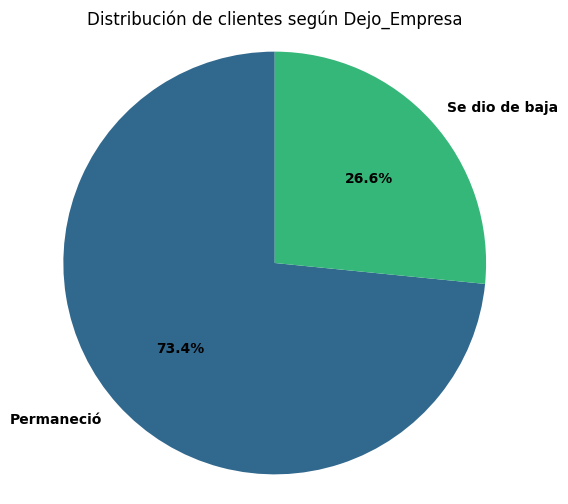

In [40]:
import matplotlib.pyplot as plt

# Conteo de clientes por estado
conteo = datos_std['Dejo_Empresa'].value_counts()

# Etiquetas personalizadas
labels = ["Permaneció", "Se dio de baja"]

# Gráfico circular
plt.figure(figsize=(6,6))
plt.pie(
    conteo,
    labels=labels,
    autopct='%1.1f%%',      # Formato del porcentaje
    startangle=90,          # Rotación inicial
    colors=sns.color_palette("viridis", 2),
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)

plt.title("Distribución de clientes según Dejo_Empresa")
plt.axis('equal')  # Mantiene el círculo perfecto
plt.show()

2. **Limpieza y Tratamiento de Datos:**

  En primer lugar analizamos si hay datos nulos, una vez comprobado ello y borrado las filas donde hay datos nulos, vemos que no halla reduncancia, por ejemplo en algunas columnas habian puesto "No internet service" cuando en realidad este dato puede ser solo "No". Luego, analizamos el tipo de dato que tiene cada variable y lo ajustamos al adecuado, inicialmente casi todos los parametros eran objet pero se cambiaron a float64 cuando implicaban precios y a int64 cuando inplican numeros enteros como el caso de la columna "Meses_Contrato", filamente realizamos una transformacion de los datos.


3. **Análisis Exploratorio de Datos:**

 En el apartado "3.3 Recuento de evasión por variables categóricas" mostramos a traves de graficos de barra las variables categoricas en cuanto a nuestra variable de analisis que es "Dejo_Empresa". Asimismo en el apartado "3.4 Conteo de evasión por variables numéricas" mostramos graficos en boxplot de las variables cuantitativas en cuanto a nuestra variable de analisis que es "Dejo_Empresa". Estos graficos realizados con las variables categoricas y cuantitativas nos permite ver que variables tiene mayor repercusion en la decision del cliente de dejar la empresa.

4. Conclusiones e Insights:

Realizando un análisis de las variables, podemos destacar que algunas tienen una relación clara con la probabilidad de que un cliente deje la empresa:

a. Meses de contrato
- Los clientes que permanecen tienen una mediana de 38 meses de permanencia,mientras los que se dieron de baja, solo 10 meses.Esto confirma que clientes más nuevos son más propensos a cancelar.

b. Tipo de contrato
- Los contratos Month-to-month concentran la mayor evasión, mientras que One year y sobre todo Two year retienen mejor.

c.	Servicio de Internet
- Fiber optic tiene la mayor tasa de baja (~42 %), seguida por DSL (~19 %) y sin Internet (~7 %).

d.	Método de pago
- Electronic check presenta la evasión más alta (~45 %), frente a métodos automáticos que retienen mejor.

e.	Servicios de soporte y seguridad
- Sin seguridad online, sin respaldo online, sin protección de dispositivos y sin soporte técnico muestran tasas de baja más altas (31 %) frente a quienes sí tienen estos servicios (~14 %).

f.	Facturación digital
-	Usuarios con factura digital tienen una tasa de baja más alta (~33,6 %) que quienes usan factura física (~16,4 %).

g.	Perfil demográfico
- Adultos mayores muestran una tasa de baja mayor (41,7 %).
- Género no presenta diferencias relevantes.
- Clientes sin pareja y sin dependientes muestran mayor evasión.

h.	Variables numéricas de facturación
- Cargo mensual: clientes que se fueron tienen una mediana de 79,65 frente a 64,45 en los que se quedaron.
- Cargo total: es mucho menor en clientes que se fueron, consistente con su menor antigüedad.
- Cuentas diarias: ligeramente más altas en quienes se fueron (2,66 vs 2,15), aunque la diferencia es menor que en otras variables.


5. Recomendaciones

a. Fomentar contratos de largo plazo

- Ofrecer descuentos y beneficios exclusivos para clientes con contrato mensual que acepten migrar a contratos anuales o bianuales.


b. Mejorar la experiencia de clientes con Fiber optic

- Revisar calidad del servicio, tiempos de respuesta y precios.

- Implementar encuestas de satisfacción y programas de retención específicos para este grupo.

c. Incentivar métodos de pago automáticos

- Bonificaciones o promociones para quienes migren de Electronic check a tarjeta o transferencia automática.


d. Paquetes de valor con servicios de soporte y seguridad

- Incluir Seguridad Online, Respaldo Online, Protección de Dispositivos y Soporte Técnico en planes base para clientes con alto riesgo de baja.